In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import geopandas as gpd
import re
import os
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.dates import AutoDateFormatter, AutoDateLocator, ConciseDateConverter, ConciseDateFormatter

In [3]:
dir = 'N:/isipd/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/Tuk_met'

In [18]:

def merge_climate_data(input_directory, output_file):
    
 
    dataframes = []

    for filename in os.listdir(input_directory):
        if filename.startswith('climate-daily') and filename.endswith('.csv'):
            filepath = os.path.join(input_directory, filename)
            df = pd.read_csv(filepath)
            dataframes.append(df)

  
    merged_df = pd.concat(dataframes, ignore_index=True)

    merged_df.to_csv(output_file, index=False)

    print(f'Merged data saved to {output_file}')



In [19]:
merge_climate_data(dir+'/2203914', dir+ '/2203914.csv')


Merged data saved to N:/isipd/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/Tuk_met/2203914.csv


In [9]:
station11_hourly = pd.read_csv(dir+ "/climate-daily-2203911.csv")
station11_hourly_mean = station11_hourly["MEAN_TEMPERATURE"].mean()
print('mean', station11_hourly_mean)
station11_hourly_min = station11_hourly["MIN_TEMPERATURE"].min()
print('min', station11_hourly_min)
station11_hourly_max = station11_hourly["MAX_TEMPERATURE"].max()
print('max', station11_hourly_max)

mean -8.212005583992553
min -44.8
max 30.0


In [13]:
station11 = pd.read_csv(dir + '/Tuk_met2203911.csv')
station11_mean = station11["TEMP"].mean()
print('mean', station11_mean)
station11_min = station11["TEMP"].min()
print('min', station11_min)
station11_max = station11["TEMP"].max()
print('max', station11_max)

mean -7.5497672775124265
min -44.6
max 29.6


C:\Users\mealiy001\AppData\Local\Temp\ipykernel_29032\998583729.py:1: DtypeWarning: Columns (10,15,16,26,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  station11 = pd.read_csv(dir + '/Tuk_met2203911.csv')


In [6]:
station11 = pd.read_csv(dir + '/Tuk_met2203911.csv')
station11['datetime'] = pd.to_datetime(station11['LOCAL_DATE'])
daily_mean_temp = station11.groupby(station11['datetime'].dt.date)['TEMP'].mean()
daily_mean_temp = daily_mean_temp.reset_index()
daily_mean_temp.columns = ['Date', 'Mean_TEMP']


C:\Users\mealiy001\AppData\Local\Temp\ipykernel_72412\342148203.py:1: DtypeWarning: Columns (10,15,16,26,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  station11 = pd.read_csv(dir + '/Tuk_met2203911.csv')


In [7]:
daily_mean_temp


,Date,Mean_TEMP
0,2015-06-04,5.783333
1,2015-06-05,3.395833
2,2015-06-06,1.000000
3,2015-06-07,1.454167
4,2015-06-08,6.791667
...,...,...
3439,2024-11-07,-7.941667
3440,2024-11-08,-8.805263
3441,2024-11-09,-11.920833
3442,2024-11-10,-12.575000


C:\Users\mealiy001\AppData\Local\Temp\ipykernel_73340\518369382.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


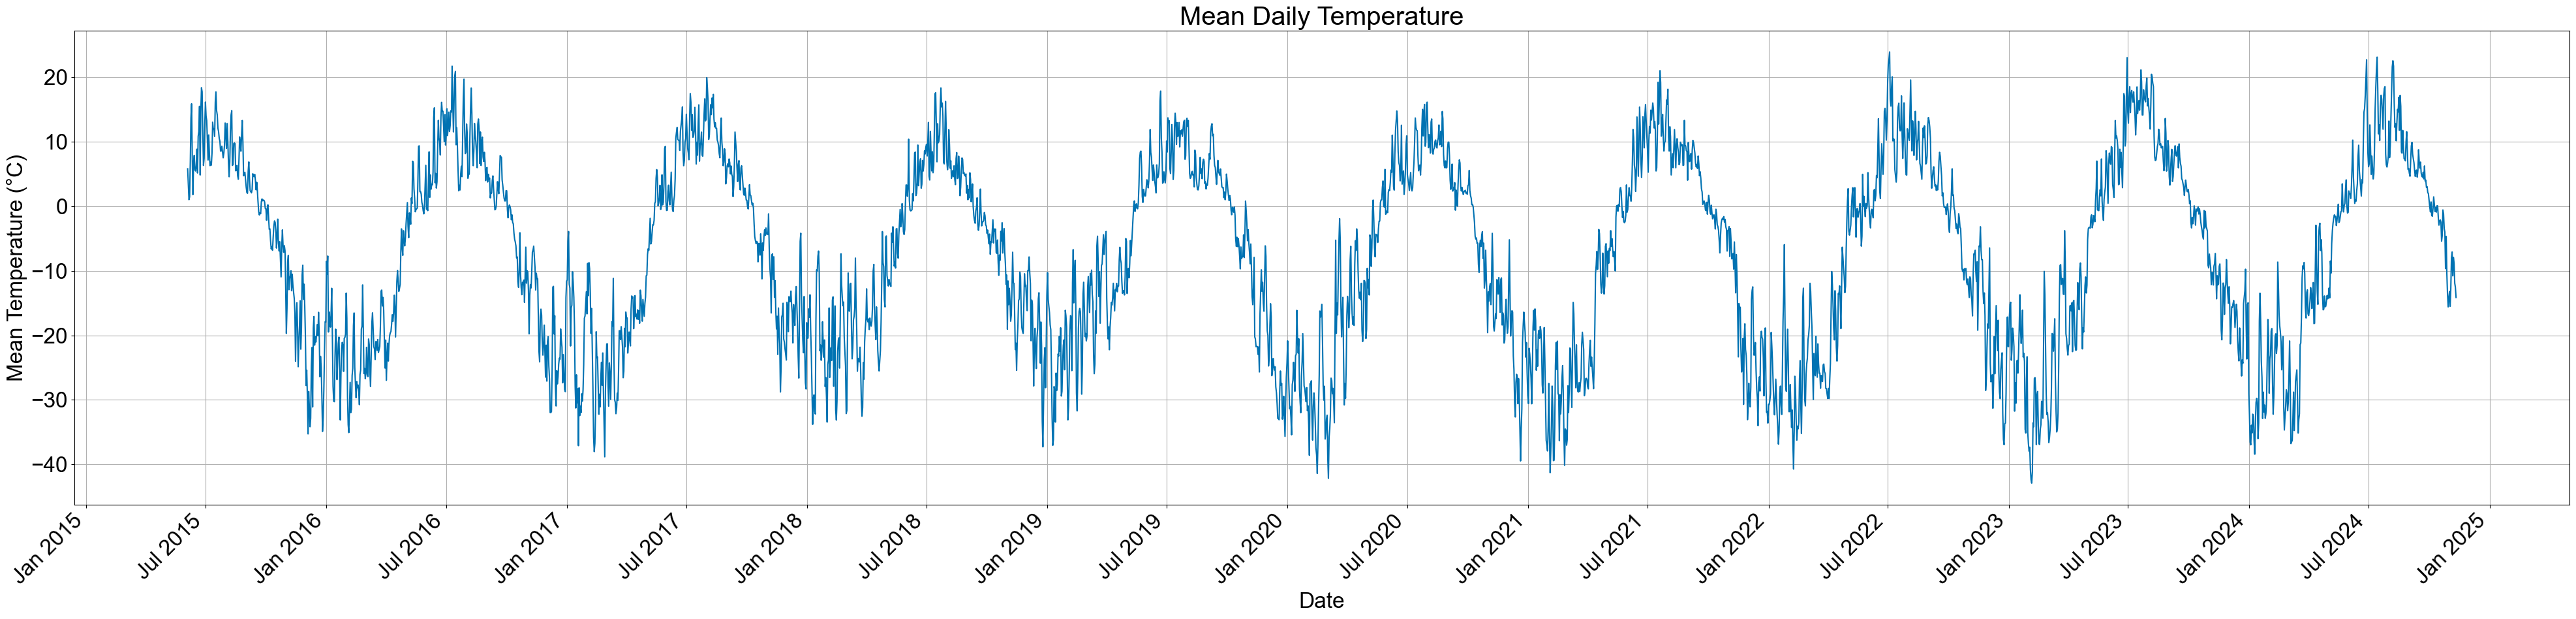

In [51]:
from matplotlib.dates import AutoDateFormatter, AutoDateLocator, ConciseDateConverter, ConciseDateFormatter


plt.figure(figsize=(40, 10))
plt.rcParams['font.size'] = 24
plt.rcParams['font.family'] = 'Arial'
plt.style.use('seaborn-v0_8-colorblind')


plt.plot(daily_mean_temp['Date'], daily_mean_temp['Mean_TEMP'], linestyle='-')

# Get the current axes and set locators and formatters
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval=6))
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# Customize the plot
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Daily Temperature')
plt.grid(True)


plt.tight_layout()
plt.show()

C:\Users\mealiy001\AppData\Local\Temp\ipykernel_72412\2658463933.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


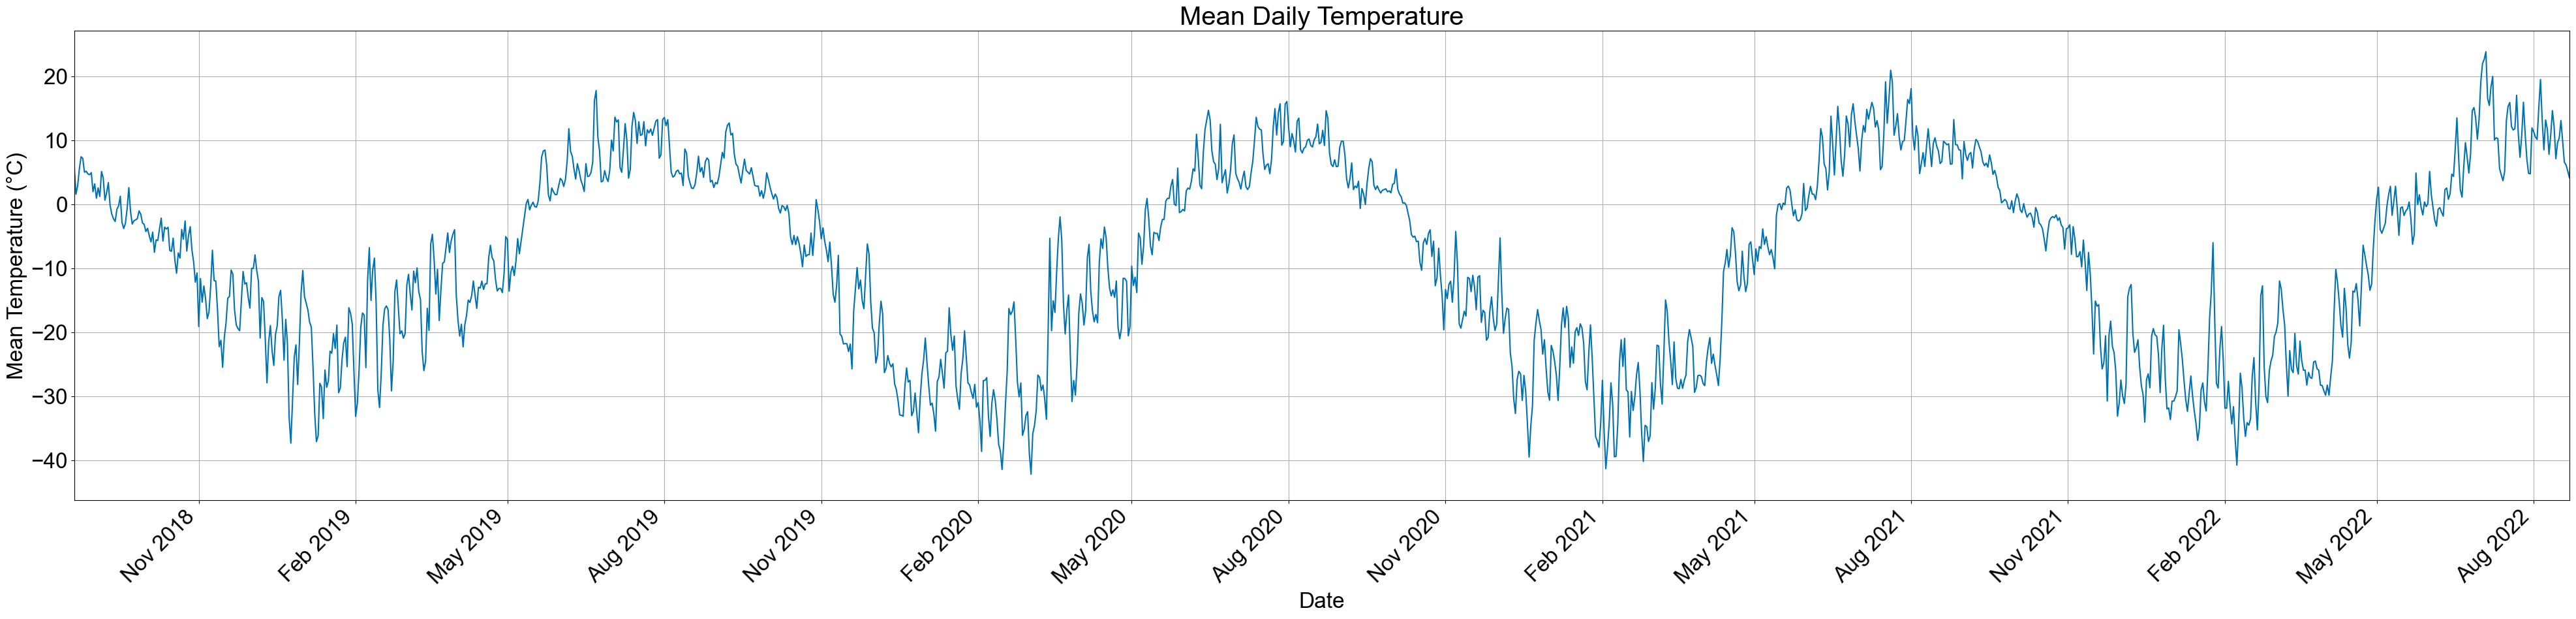

In [13]:
from matplotlib.dates import AutoDateFormatter, AutoDateLocator, ConciseDateConverter, ConciseDateFormatter


plt.figure(figsize=(40, 10))
plt.rcParams['font.size'] = 24
plt.rcParams['font.family'] = 'Arial'
plt.style.use('seaborn-v0_8-colorblind')


plt.plot(daily_mean_temp['Date'], daily_mean_temp['Mean_TEMP'], linestyle='-')

# Get the current axes and set locators and formatters
ax = plt.gca()
ax.set_xlim(pd.to_datetime('2018-08-20T00:00:00.000'), pd.to_datetime('2022-08-22T00:00:00.000'))
ax.xaxis.set_major_locator(MonthLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# Customize the plot
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Daily Temperature')
plt.grid(True)


plt.tight_layout()
plt.show()

In [ ]:
station14 = pd.read_csv(dir + '/2203914.csv')
station14

In [21]:
station14_mean = station14["MEAN_TEMPERATURE"].mean()
print('mean', station14_mean)
station14_min = station14["MIN_TEMPERATURE"].min()
print('min', station14_min)
station14_max = station14["MAX_TEMPERATURE"].max()
print('max', station14_max)

mean -8.447420244190626
min -43.2
max 30.4


In [22]:
station14['datetime'] = pd.to_datetime(station14['LOCAL_DATE'])

C:\Users\mealiy001\AppData\Local\Temp\ipykernel_29032\3402033320.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


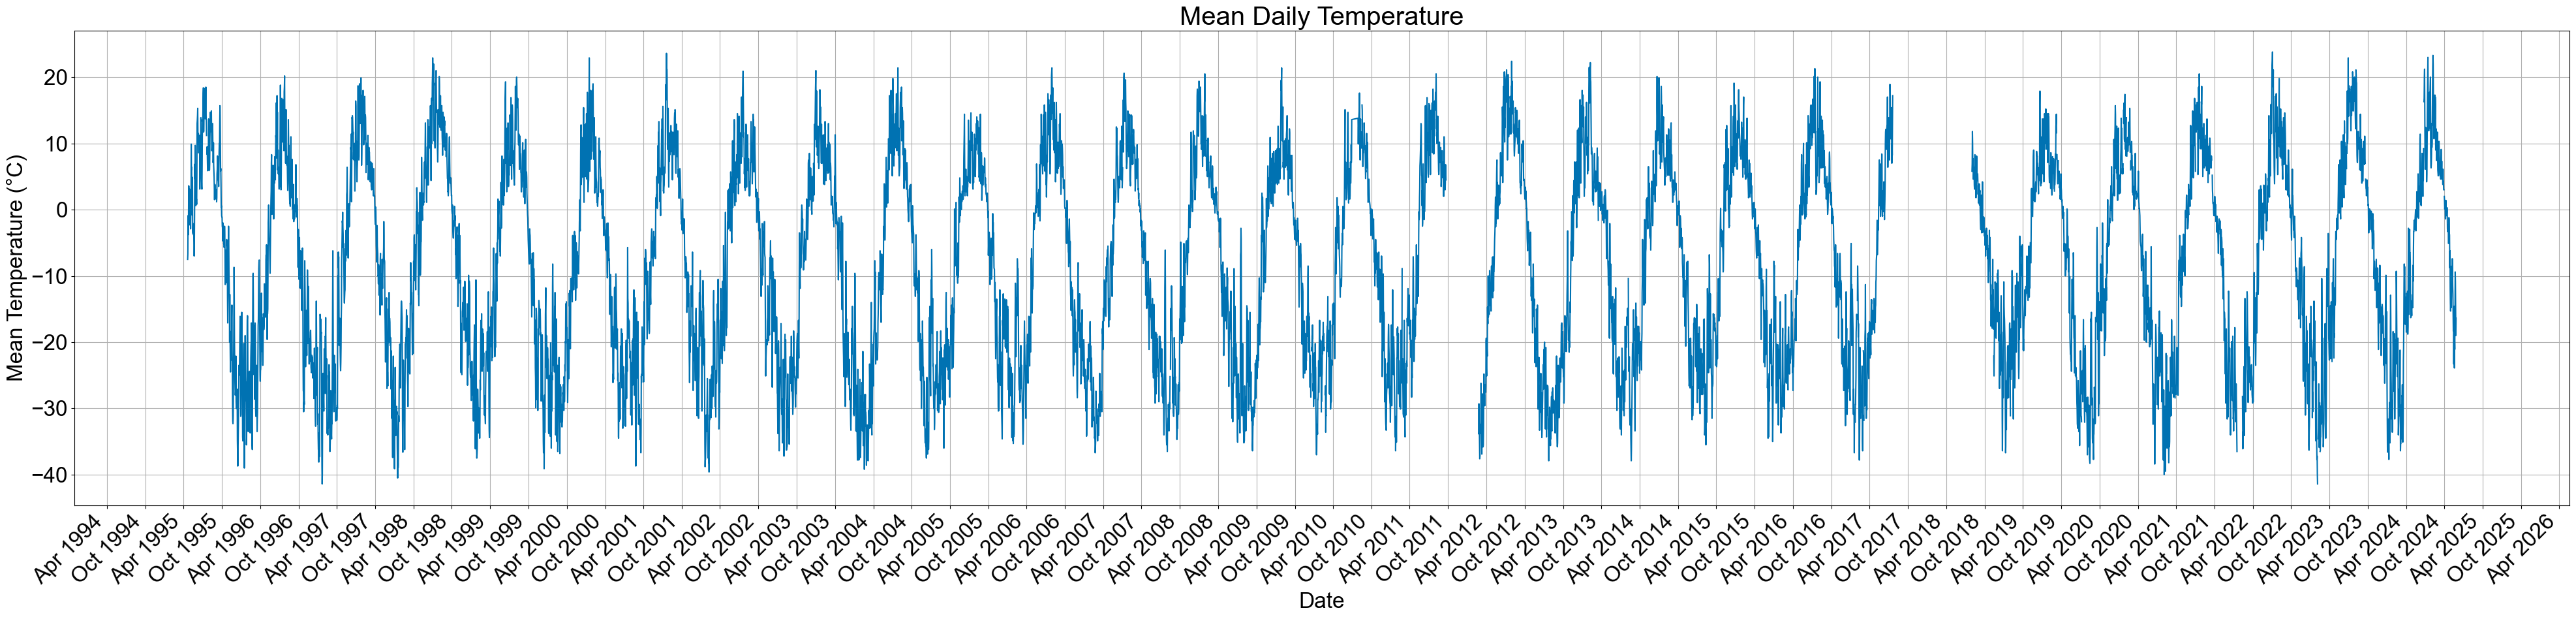

In [24]:
from matplotlib.dates import AutoDateFormatter, AutoDateLocator, ConciseDateConverter, ConciseDateFormatter


plt.figure(figsize=(40, 10))
plt.rcParams['font.size'] = 24
plt.rcParams['font.family'] = 'Arial'
plt.style.use('seaborn-v0_8-colorblind')


plt.plot(station14['datetime'], station14['MEAN_TEMPERATURE'], linestyle='-')

# Get the current axes and set locators and formatters
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval=6))
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# Customize the plot
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Daily Temperature')
plt.grid(True)


plt.tight_layout()
plt.show()

C:\Users\mealiy001\AppData\Local\Temp\ipykernel_29032\2230110532.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


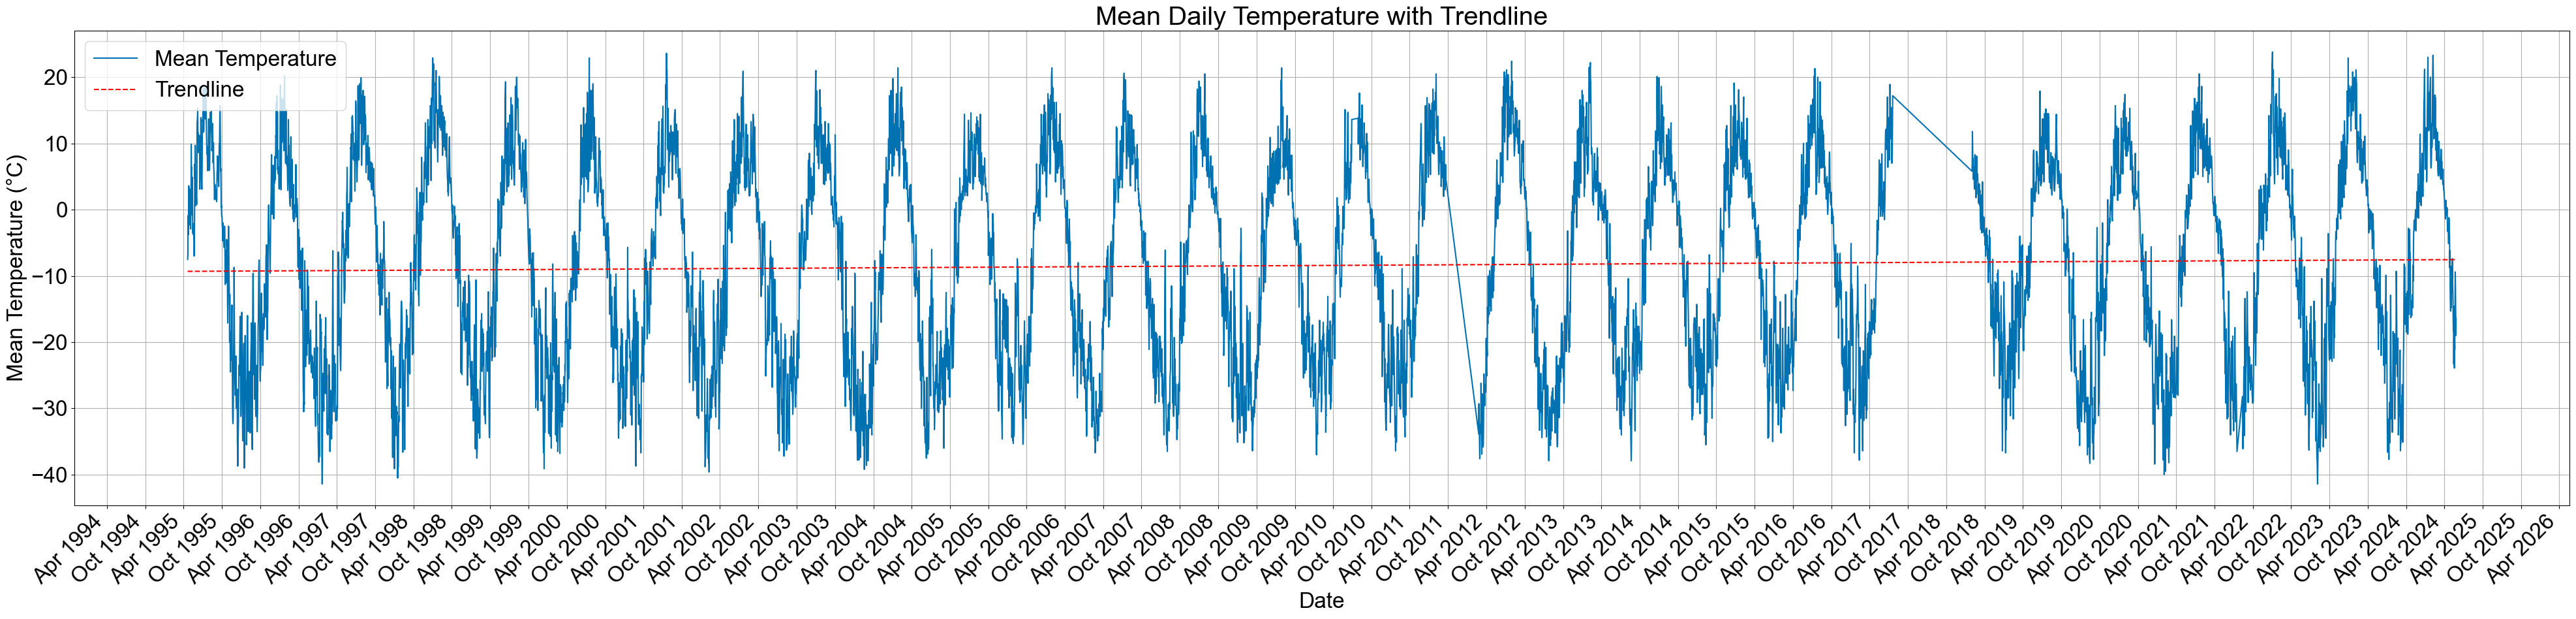

In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

# Handle missing values
station14 = station14.dropna(subset=['MEAN_TEMPERATURE'])  # Remove NaNs
# Alternatively, interpolate: station14['MEAN_TEMPERATURE'] = station14['MEAN_TEMPERATURE'].interpolate(method='linear')

# Convert datetime to numeric format for regression
station14['numeric_date'] = station14['datetime'].map(lambda x: x.toordinal())

# Fit a linear regression model
X = station14['numeric_date'].values.reshape(-1, 1)  # Predictor (numeric date)
y = station14['MEAN_TEMPERATURE'].values  # Response (temperature)
model = LinearRegression()
model.fit(X, y)

# Predict temperature values using the model
trendline = model.predict(X)

# Plot the data
plt.figure(figsize=(40, 10))
plt.rcParams['font.size'] = 24
plt.rcParams['font.family'] = 'Arial'
plt.style.use('seaborn-v0_8-colorblind')

plt.plot(station14['datetime'], station14['MEAN_TEMPERATURE'], linestyle='-', label='Mean Temperature')
plt.plot(station14['datetime'], trendline, color='red', linestyle='--', label='Trendline')  # Trendline

# Get the current axes and set locators and formatters
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval=6))
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Daily Temperature with Trendline')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



In [29]:
slope = model.coef_[0]  # The rate of change in temperature per day
slope_per_year = slope * 365  # Approximate annual change
slope_per_year

0.05988476225755402

In [30]:
# Add a 'year' column for grouping
station14['year'] = station14['datetime'].dt.year

# Calculate total yearly precipitation
total_yearly_precipitation = station14.groupby('year')['TOTAL_PRECIPITATION'].sum()

# Calculate mean daily precipitation
mean_daily_precipitation = station14['TOTAL_PRECIPITATION'].mean()

# Print results
print("Total Yearly Precipitation (mm):")
print(total_yearly_precipitation)

print(f"\nMean Daily Precipitation (mm/day): {mean_daily_precipitation:.2f}")

Total Yearly Precipitation (mm):
year
1995      0.0
1996      0.0
1997      0.0
1998      0.0
1999     18.6
2000      0.0
2001      0.0
2002      0.0
2003      0.0
2004      0.0
2005      0.0
2006      0.0
2007      0.0
2008      0.0
2009      0.0
2010      0.0
2011      0.0
2012      0.0
2013      0.0
2014      0.0
2015      0.0
2016      0.0
2017      0.0
2018      0.0
2019      0.0
2020      0.0
2021     55.8
2022    145.1
2023    123.8
2024    186.3
Name: TOTAL_PRECIPITATION, dtype: float64

Mean Daily Precipitation (mm/day): 0.59
